# TME 1

**Etu:**   Alex YE  
**N°Etu:** 3870665

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp as sm

## Statistic tests

In [2]:
df_mice = pd.read_excel('data/Data_Cortex_Nuclear.xls')
df_mice.fillna( df_mice.median() , inplace = True)

df_mice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [3]:
df_mice.drop(columns = 'MouseID', inplace = True)
to_quantify = ['Treatment', 'Behavior']
data = df_mice
for c in to_quantify:
    dumbed_up = pd.get_dummies(df_mice[c]) 
    data.drop(columns = c, inplace = True)
    data = data.join(dumbed_up)
    
data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,class,Memantine,Saline,C/S,S/C
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.114783,0.131790,0.128186,1.675652,Control,c-CS-m,1,0,1,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.111974,0.135103,0.131119,1.743610,Control,c-CS-m,1,0,1,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.111883,0.133362,0.127431,1.926427,Control,c-CS-m,1,0,1,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.130405,0.147444,0.146901,1.700563,Control,c-CS-m,1,0,1,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.118481,0.140314,0.148380,1.839730,Control,c-CS-m,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.318782,0.204660,0.328327,1.364823,Ts65Dn,t-SC-s,0,1,0,1
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.325639,0.200415,0.293435,1.364478,Ts65Dn,t-SC-s,0,1,0,1
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.321306,0.229193,0.355213,1.430825,Ts65Dn,t-SC-s,0,1,0,1
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.335936,0.251317,0.365353,1.404031,Ts65Dn,t-SC-s,0,1,0,1


In [4]:
#data = df_mice.drop(columns=['Treatment', 'Behavior', 'MouseID'])

data["class"] = data["class"] == "c-CS-m"         #binaire
data["Genotype"] = data["Genotype"] == "Control"  #binaire
data.rename(columns={"Genotype": 'Control'}, inplace = True)

data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Control,class,Memantine,Saline,C/S,S/C
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.114783,0.131790,0.128186,1.675652,True,True,1,0,1,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.111974,0.135103,0.131119,1.743610,True,True,1,0,1,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.111883,0.133362,0.127431,1.926427,True,True,1,0,1,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.130405,0.147444,0.146901,1.700563,True,True,1,0,1,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.118481,0.140314,0.148380,1.839730,True,True,1,0,1,0


In [5]:
p_correlation_dic = {}
strongs = 0
unsignificant = 0 
pvals = []
for col in data.columns:
    if(col == 'class'):
        continue
    cor = stats.pearsonr( data[col], data["class"])
    #print(col, '\t', cor )
    strongs +=  (cor[0] >= 0.7 or cor[0] <= -0.7)
    unsignificant += cor[1] > 0.05
    #if(cor[1] > 0.05 or cor[0] <= 0.7):
    #    continue
    #p_correlation_dic[col] = cor
    pvals.append(cor[1])
    
print(strongs, "strong correlations;", unsignificant, "unsignificant variable")

0 strong correlations; 31 unsignificant variable


In [6]:
mt_p = sm.multipletests(pvals, 0.05)
mt_p

(array([False, False,  True, False,  True, False, False,  True,  True,
        False,  True, False,  True, False,  True, False, False,  True,
        False, False, False, False, False, False,  True,  True,  True,
        False,  True, False, False, False,  True,  True, False, False,
        False,  True,  True,  True, False, False,  True, False, False,
         True,  True,  True, False,  True,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False,
         True,  True,  True, False, False, False, False, False,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True]),
 array([1.31967478e-01, 8.50077521e-01, 3.71056413e-06, 5.59836832e-02,
        2.18409191e-09, 9.96103778e-01, 9.99381732e-01, 1.22942535e-08,
        6.07754874e-07, 8.71823472e-01, 1.45565542e-06, 8.17357754e-01,
        1.41000279e-06, 7.79464164e-01, 4.90412857e-03, 6.93425803e-02,
        9.74142258e-01, 1.41877098e-04, 9.99381732e-01, 

In [7]:
strongs = 0
unsignificant = 0 
pvals = []
for col in data.columns:
    if(col == 'class'):
        continue
    cor = stats.wilcoxon( data[col], list(map(float,data["class"])) )
    #print(col, '\t', cor )
    #strongs +=  (cor[0] >= 0.7 or cor[0] <= -0.7)
    unsignificant += cor[1] > 0.05
    #if(cor[1] > 0.05 or cor[0] <= 0.7):
    #    continue
    #w_correlation_dic[col] = cor
    pvals.append(cor[1])
    
    
print(unsignificant, "unsignificant variable")

0 unsignificant variable


Est-ce correct de comparer à la classe ? 
Je ne vois pas avec quoi d'autre je devrais comparer les variables.

In [8]:
mt_w= sm.multipletests(pvals, 0.05)
mt_w

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

Après correction on a plus de p-value pour la méthode wilcoxon.  
En effet, toutes les variables pouvant être rejetées avec une marge d'erreur de 0.05  
De ce fait la méthode pearson est meilleure.  
Ce sera la méthode que l'on choisira

In [9]:
reject = mt_p[0]
names = list(data.columns) 
names.remove("class") 

cols = [c for (d,c) in zip(reject,names) if not d ]
data.drop(columns = cols, inplace=True)
data.head()

,BDNF_N,NR2A_N,pCAMKII_N,pCREB_N,pERK_N,PKCA_N,pNR1_N,pPKCAB_N,ERK_N,GSK3B_N,...,SYP_N,H3AcK18_N,H3MeK4_N,CaNA_N,Control,class,Memantine,Saline,C/S,S/C
0,0.430175,5.990152,2.373744,0.232224,0.687906,0.402698,1.022060,2.308745,3.685247,1.537227,...,0.427099,0.114783,0.128186,1.675652,True,True,1,0,1,0
1,0.411770,5.685038,2.292150,0.226972,0.695006,0.385987,0.956676,2.043037,3.485287,1.509249,...,0.441581,0.111974,0.131119,1.743610,True,True,1,0,1,0
2,0.418309,5.622059,2.283337,0.230247,0.677348,0.381002,1.003635,2.017984,3.571456,1.501244,...,0.435777,0.111883,0.127431,1.926427,True,True,1,0,1,0
3,0.358626,4.979503,2.152301,0.207004,0.583277,0.377087,0.875390,2.132754,2.970137,1.419710,...,0.391691,0.130405,0.146901,1.700563,True,True,1,0,1,0
4,0.358802,4.718679,2.134014,0.192158,0.550960,0.363502,0.864912,2.013697,2.896334,1.359876,...,0.434154,0.118481,0.148380,1.839730,True,True,1,0,1,0


[  5.46057473   6.71724544  -6.44795733  -5.79800211   5.6372426
   5.64555553   3.90935606   4.73077011   7.96866695   6.27863612
   4.78839993   3.60413303 -10.45528607   5.1174405    5.49442496
   4.24373848  12.01204046  -6.15901978   3.46680476  -5.08336733
   3.86177411   5.78443703  -4.82653103  -4.68365877  -4.91900163
  -4.06146311  -4.71193961  -3.6224475    4.27146661  -5.52059034
  -4.90644599   7.95598671  13.48352905  13.48352905 -13.48352905
  14.88586205 -14.88586205]
[5.889795088448028e-08, 2.99190188589395e-11, 1.707535095796283e-10, 8.808044288707785e-09, 2.205540098597464e-08, 2.1044832440910616e-08, 9.83190316968071e-05, 2.5336961370750487e-06, 4.058534145175511e-15, 4.942902442920222e-10, 1.9156536151190726e-06, 0.00032750358994737544, 1.9518803266098473e-24, 3.6649304225729856e-07, 4.889893968866074e-08, 2.387347631802998e-05, 2.7624980217639273e-31, 1.0316509782132126e-09, 0.0005474447121439608, 4.3692405242172823e-07, 0.00011926807657509132, 9.525789631079721e-

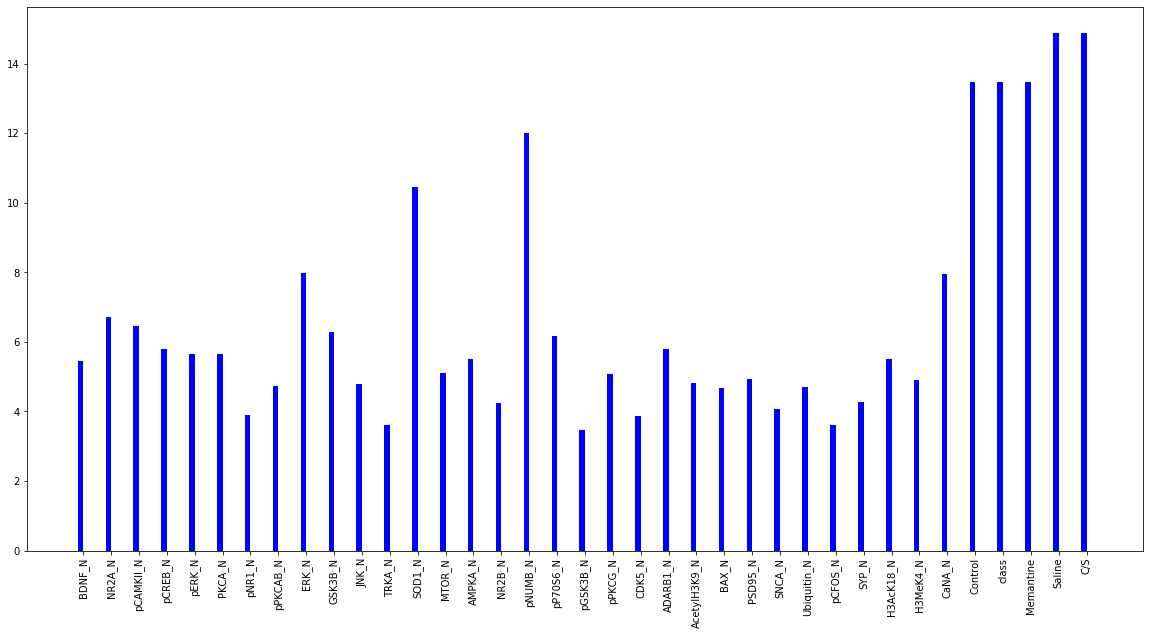

In [10]:
a = data[data["class"] == True]
b = data[data["class"] == False]

s = []
p = []
for c in data.columns:
    if(c != "class"):
        stat,pval = stats.ttest_ind( a[c], b[c] ) 
        s.append(stat)
        p.append(pval)
      
s = np.array(s)
print(s)
print(p)

s = np.where(s < 0, -s, s) #ne change rien, l'important est la distance à 0 
        
xs = np.arange(len(s))

plt.figure(figsize=(20,10))

plt.bar(xs, s, width=0.2, color='b', align='center')
plt.bar(xs+0.2, p, width=0.2, color='r', align='center')
plt.xticks(xs+0.1, data.columns, rotation= 'vertical')

plt.show()

Comme l'on a 1080 exemples.
Pour avoir une fiabilité de 5%, nous pouvons prendre toutes les barres au dessus de 1.645.
Dans notre cas cela signifie toutes les barres.

pvalue très proche de zéro (échantillon déjà filtrée), invisible sur le graphique

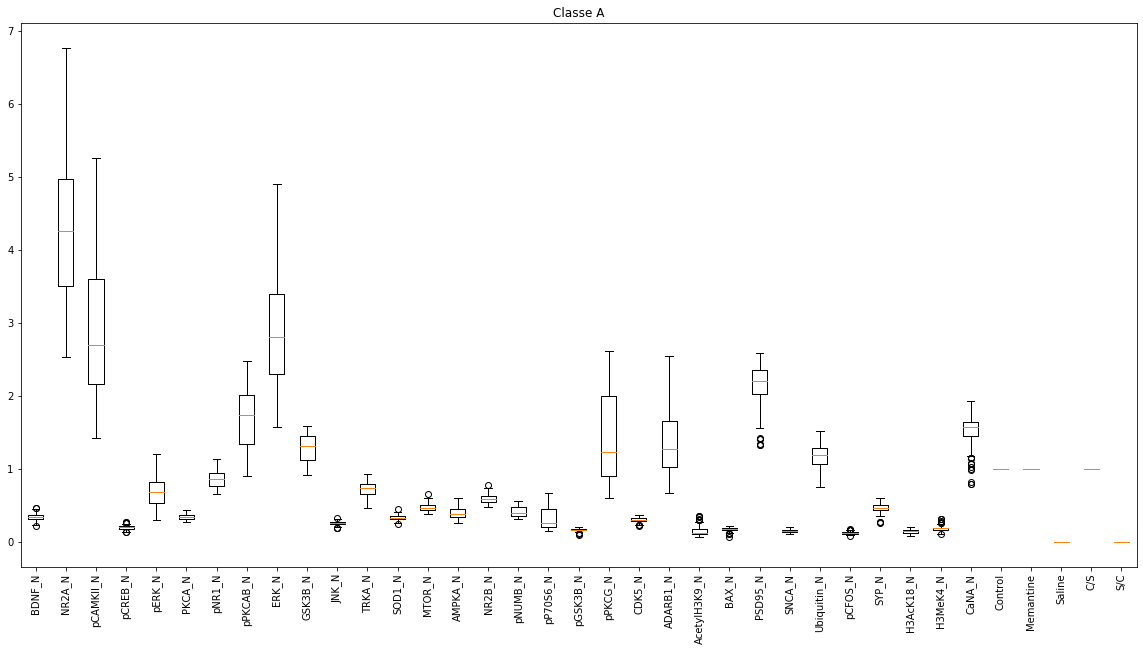

In [11]:
class_A = {}
for c in data.columns:
    if(c != "class"):
        class_A[c] = a[c]
        
        
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(class_A.values())
ax.set_xticklabels(class_A.keys(), rotation= 'vertical')
plt.title("Classe A")
plt.show()

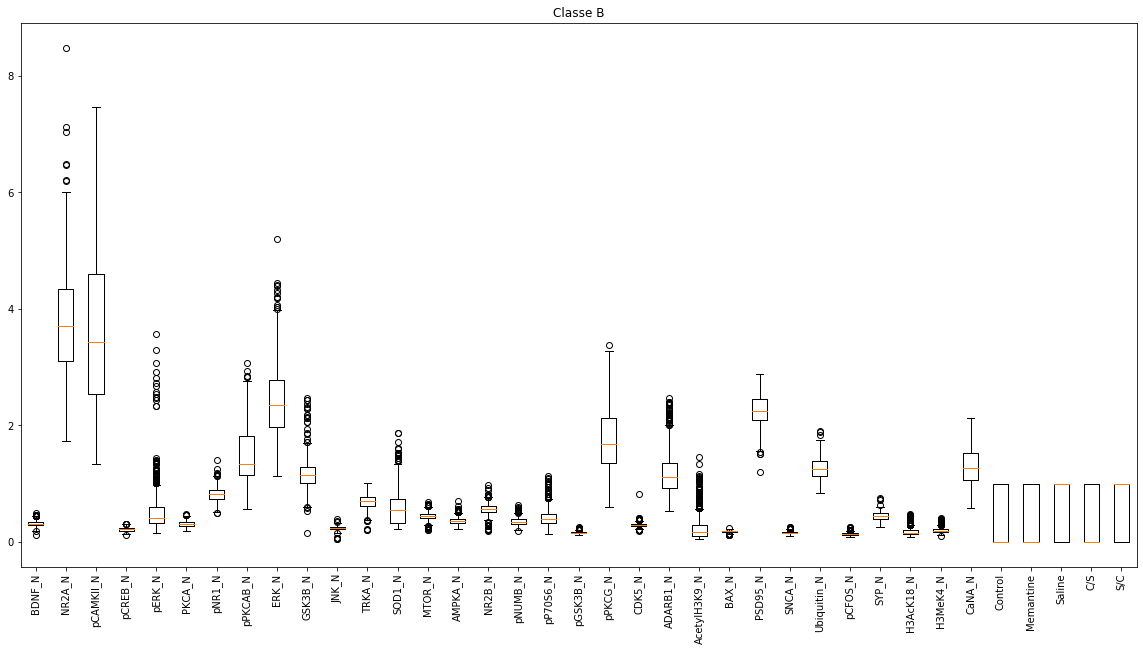

In [12]:
class_B = {}
for c in data.columns:
    if(c != "class"):
        class_B[c] = b[c]
        
        
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(class_B.values())
ax.set_xticklabels(class_B.keys(), rotation= 'vertical')
plt.title("Classe B")
plt.show()

Nous voulons privilégier les boîtes plus courtes.  
Les résultats se concordent.  
On a peu de variabilité en 'milieu' et 'fin' de graphique.  

Avec la méthode de pearson nous avons pu réduire la taille du problème, nous faisons ce choix par défaut car la méthode wilcoxon ne donne aucun résultat.  
Nous pourrions diminuer la marge d'erreur et réduire encore un peu le problème.  
Néanmoins nous pouvons déjà voir les variables les plus significatives.  
Cal_N, Control, Memantine, Saline, C/S, S/C.  (Les 5 dernières).  

Nous retiendrons en particulier **Saline** et **C/S**. 

## ADA BOOST

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

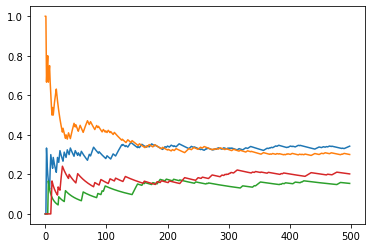

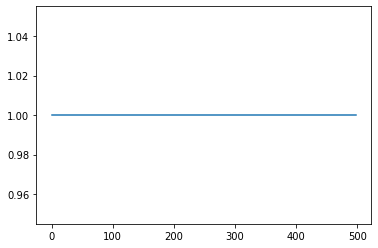

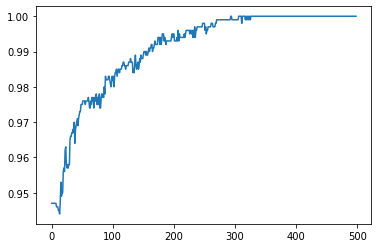

In [14]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)


imp = []
pred = []
score = []
for i in range(1,500):
    clf = AdaBoostClassifier(n_estimators= i, random_state=0)
    clf.fit(X, y)  

    imp.append(clf.feature_importances_)
    pred.append(clf.predict([[0, 0, 0, 0]]))
    score.append(clf.score(X, y)  )
    
plt.plot(imp)
plt.show()

plt.plot(pred)
plt.show()

plt.plot(score)
plt.show()

la précision est toujours forte 95% et va jusqu'à 100% plus le nombre d'estimateur augmente   
on observe que le poids des 4 features se stabilise aux environ de 200 estimateurs. 

## 2D AdaBoost

Plot des 2 variables réelles sélectionnées

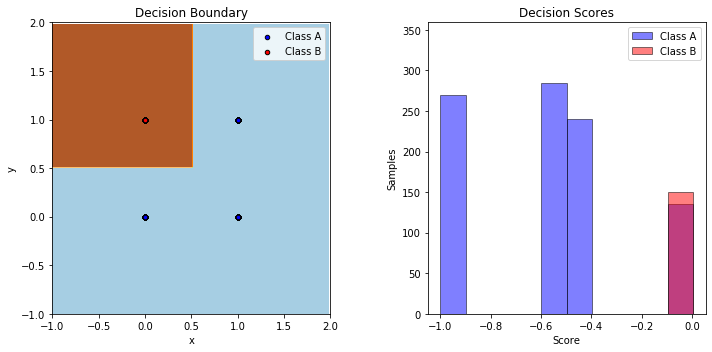

In [15]:
from sklearn.tree import DecisionTreeClassifier

X = data[["Saline","C/S"]]
y = data["class"]

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

X = np.array(X)
y = np.array(y)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

On voit que la frontière n'est pas linéaire comme il y a plus d'une droite.  
Donc AdaBoost est un classifieur non-linéaire.  